In [1]:
import sklearn
import tkinter as tk
import numpy as np
import pandas as pd
import plotly as plot
import plotly.express as px
import plotly.graph_objs as go

import cufflinks as cf
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import accuracy_score,mean_squared_error
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot


In [2]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
heart=pd.read_csv('heart.csv')

In [4]:
heart


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(heart.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [6]:
heart['target']

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [7]:
heart.groupby('target').size()

target
0    138
1    165
dtype: int64

In [8]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
heart['target'].unique()

array([1, 0], dtype=int64)

In [11]:
#Visualization

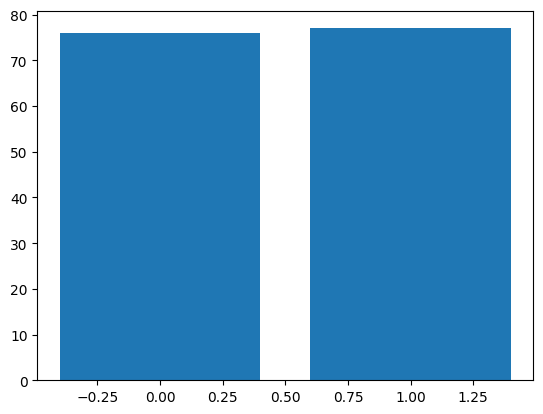

In [12]:
plt.bar(x=heart['sex'],height=heart['age'])
plt.show()

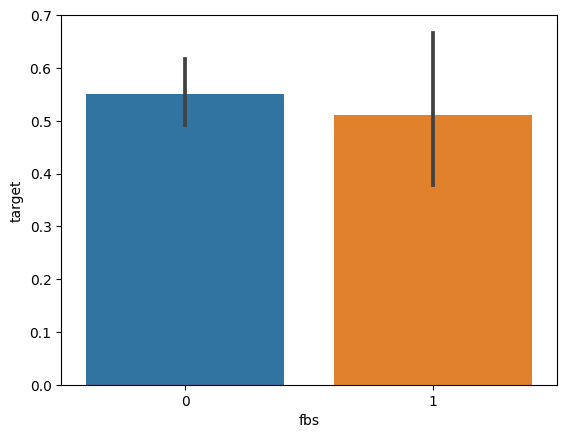

In [13]:
sns.barplot(x="fbs", y="target", data=heart)
plt.show()

<Axes: xlabel='sex', ylabel='age'>

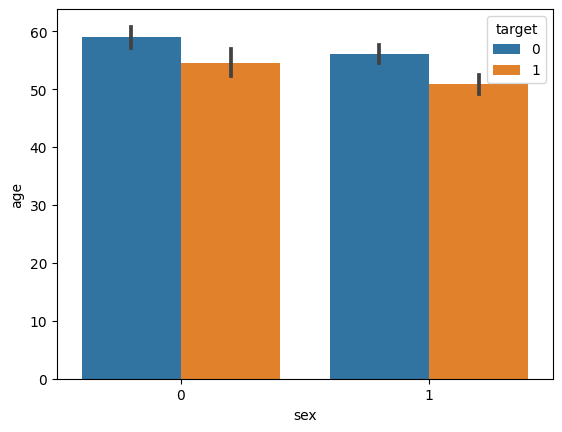

In [14]:
sns.barplot(x=heart['sex'],y=heart['age'],hue=heart['target'])

<Axes: xlabel='cp', ylabel='target'>

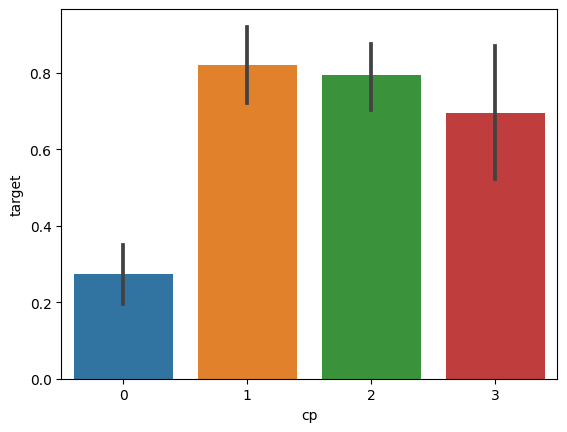

In [15]:
# sns.barplot(heart["cp"],heart["target"])
sns.barplot(x="cp", y="target", data=heart)

<Axes: xlabel='sex', ylabel='target'>

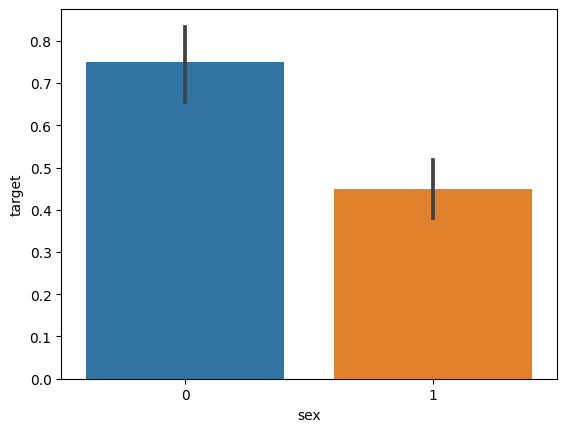

In [16]:
# sns.barplot(heart["sex"],heart['target'])
sns.barplot(x="sex", y="target", data=heart)

In [17]:
# px.bar(heart,heart['sex'],heart['target'])

C:\Users\Shubham\AppData\Local\Temp\ipykernel_13900\884938407.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='thal', ylabel='Density'>

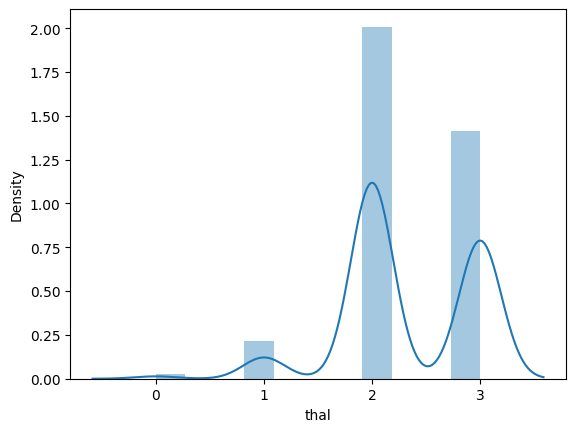

In [18]:
sns.distplot(heart["thal"])

C:\Users\Shubham\AppData\Local\Temp\ipykernel_13900\2909701137.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='chol', ylabel='Density'>

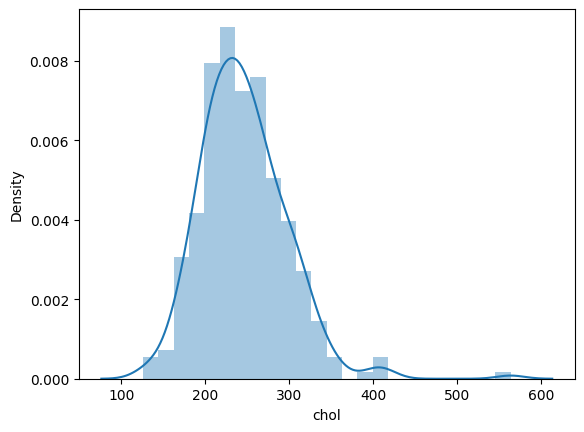

In [19]:
sns.distplot(heart["chol"])

In [20]:

# sns.pairplot(heart,hue='target')

In [21]:
numeric_columns=['trestbps','chol','thalach','age','oldpeak']

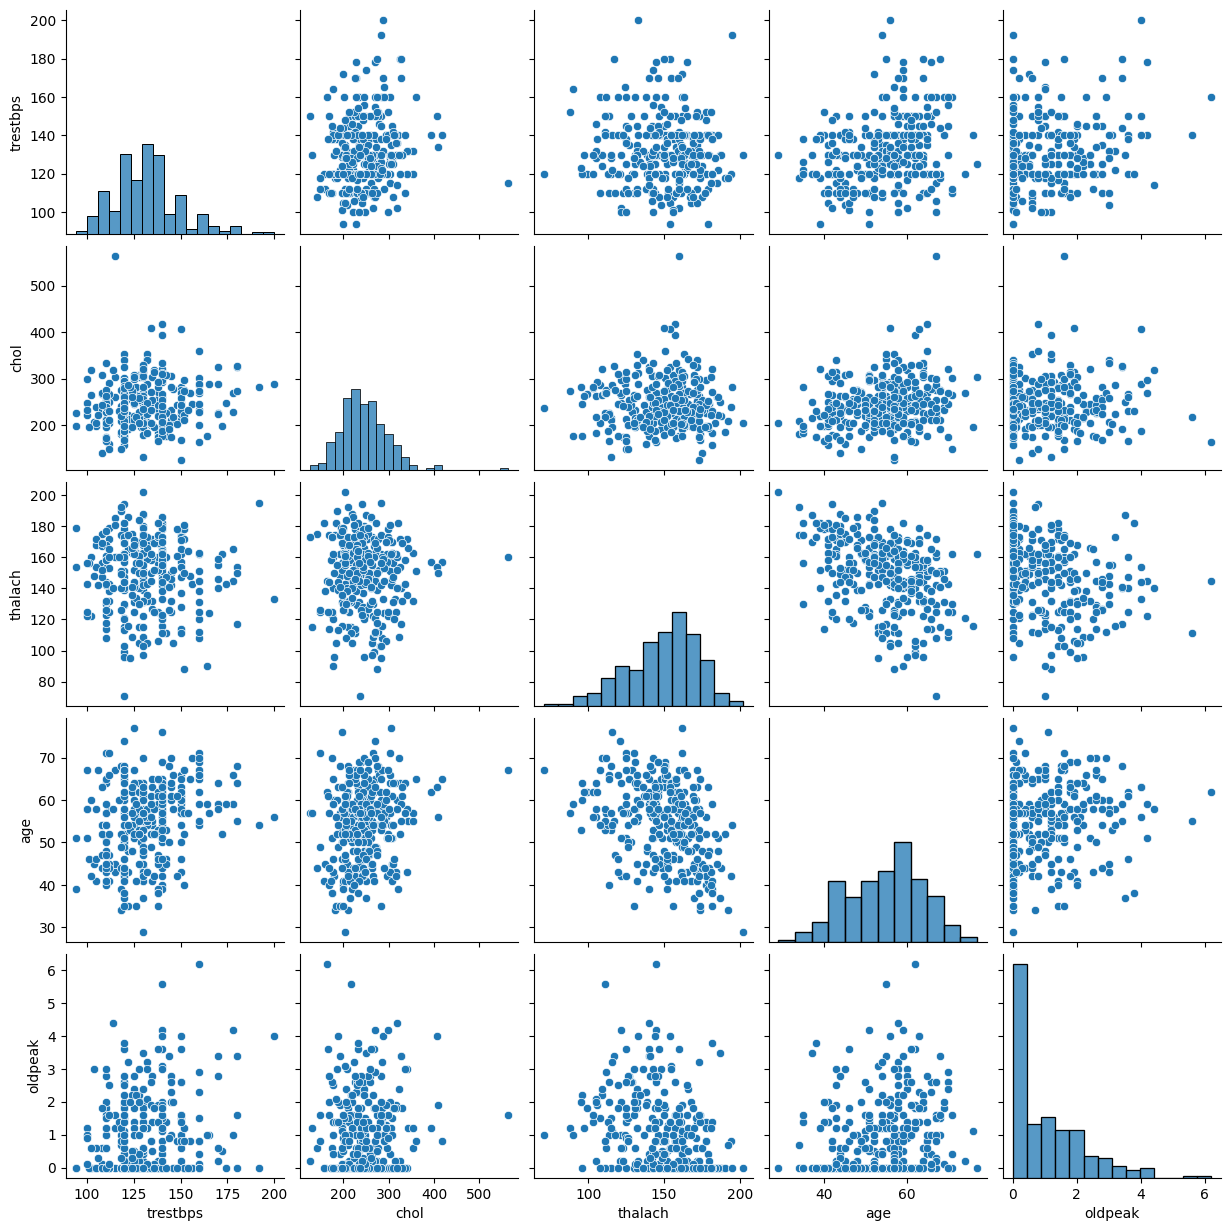

In [22]:

sns.pairplot(heart[numeric_columns])

In [23]:
heart['target']

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

target
1    165
0    138
Name: count, dtype: int64


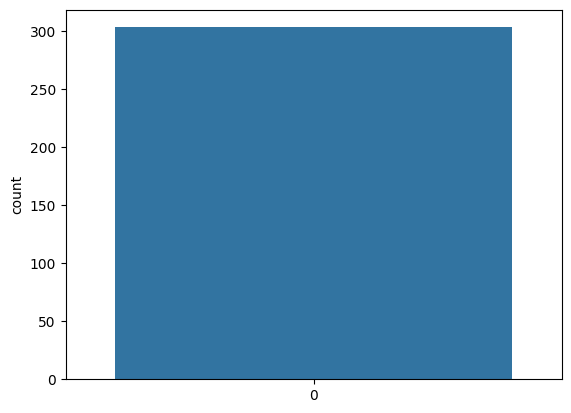

In [24]:
y = heart["target"]

sns.countplot(y)

target_temp = heart.target.value_counts()

print(target_temp)


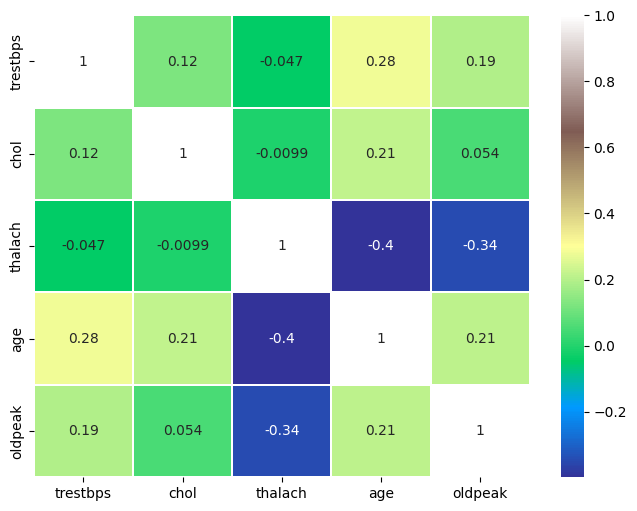

In [25]:
# create a correlation heatmap
sns.heatmap(heart[numeric_columns].corr(),annot=True, cmap='terrain', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

C:\Users\Shubham\AppData\Local\Temp\ipykernel_13900\2929698976.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Shubham\AppData\Local\Temp\ipykernel_13900\2929698976.py:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Shubham\AppData\Local\Temp\ipykernel_13900\2929698976.py:10: UserWarning:



`distp

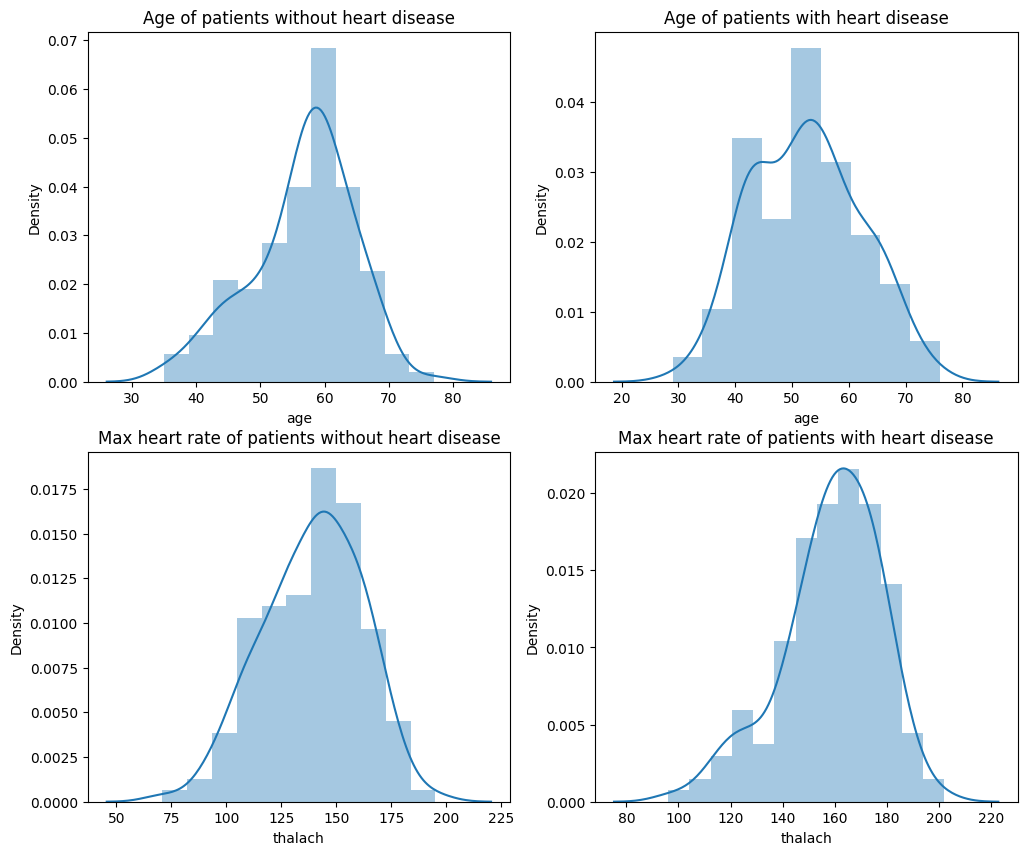

In [26]:
# create four distplots
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(heart[heart['target']==0].age)
plt.title('Age of patients without heart disease')
plt.subplot(222)
sns.distplot(heart[heart['target']==1].age)
plt.title('Age of patients with heart disease')
plt.subplot(223)
sns.distplot(heart[heart['target']==0].thalach )
plt.title('Max heart rate of patients without heart disease')
plt.subplot(224)
sns.distplot(heart[heart['target']==1].thalach )
plt.title('Max heart rate of patients with heart disease')
plt.show()

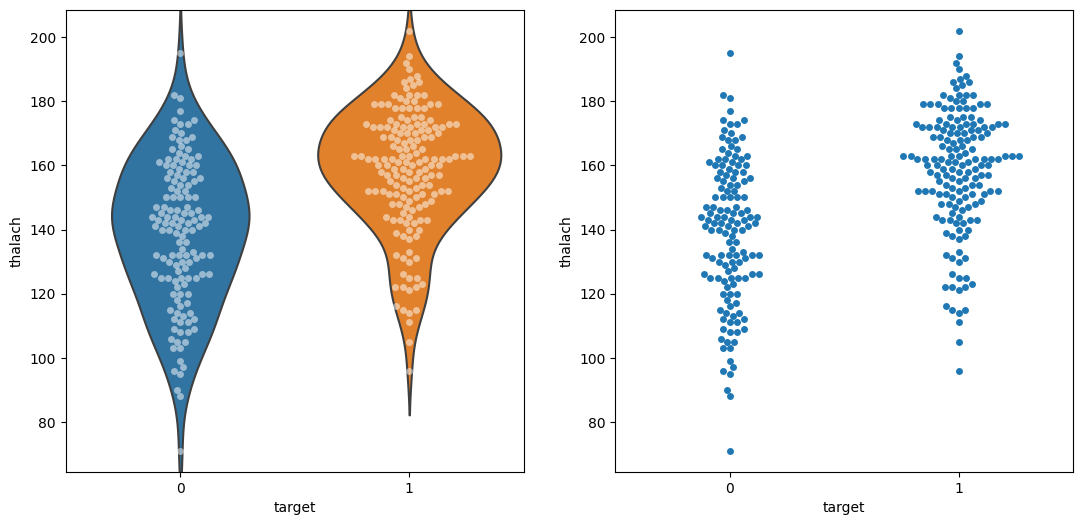

In [27]:
plt.figure(figsize=(13,6))
plt.subplot(121)
sns.violinplot(x="target", y="thalach", data=heart, inner=None)
sns.swarmplot(x="target", y="thalach", data=heart, color='w', alpha=0.5)


plt.subplot(122)
sns.swarmplot(x="target", y="thalach", data=heart)
plt.show()

In [28]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


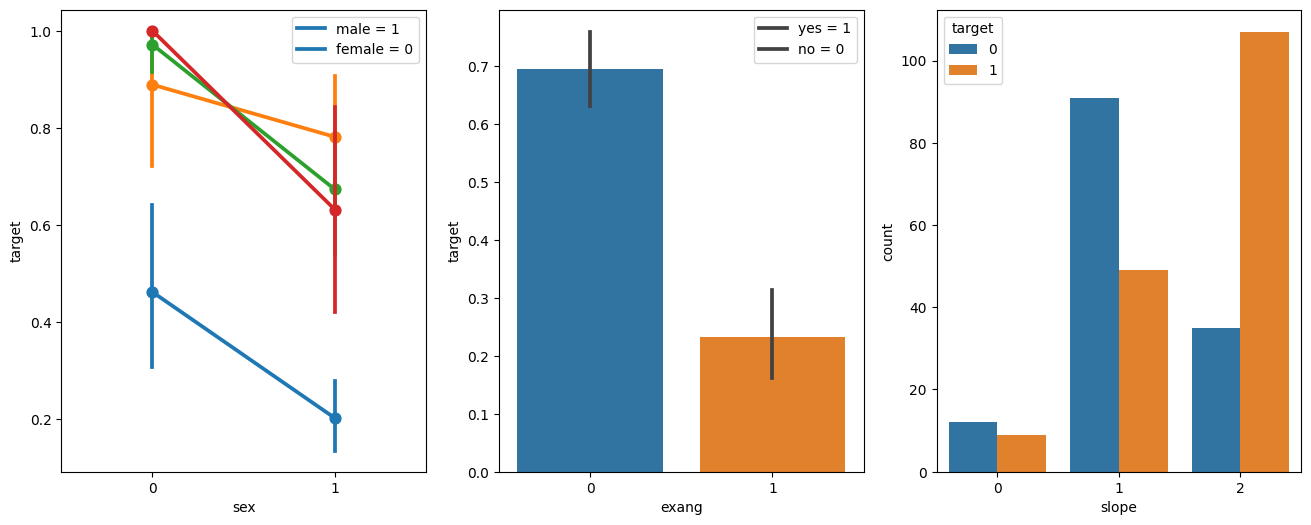

In [29]:
# create pairplot and two barplots
plt.figure(figsize=(16,6))
plt.subplot(131)
sns.pointplot(x="sex", y="target", hue='cp', data=heart)
plt.legend(['male = 1', 'female = 0'])
plt.subplot(132)
sns.barplot(x="exang", y="target", data=heart)
plt.legend(['yes = 1', 'no = 0'])
plt.subplot(133)
sns.countplot(x="slope", hue='target', data=heart)
plt.show()

In [30]:
#DATA Preprocessing

In [31]:
########################################################################################

In [32]:
heart['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [33]:
heart['target'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Name: target, Length: 303, dtype: bool

In [34]:


heart['target'].sum()

165

In [35]:
heart['target'].unique()

array([1, 0], dtype=int64)

In [36]:


heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [37]:

#Storing in X and y

In [38]:
X,y=heart,heart.target

In [39]:
X.drop('target',axis=1,inplace=True)

In [40]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [41]:

####Or X, y = heart.iloc[:, :-1], heart.iloc[:, -1]

In [42]:
X.shape

(303, 13)

In [43]:

y.shape

(303,)

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [45]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [46]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10,test_size=0.3,shuffle=True)

In [47]:
X_test

array([[ 0.18017482, -1.46841752, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.40075247,  0.68100522,  1.00257707, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 1.06248543,  0.68100522,  1.00257707, ..., -0.64911323,
        -0.71442887,  1.12302895],
       ...,
       [ 0.29046364,  0.68100522,  1.00257707, ..., -0.64911323,
         0.26508221,  1.12302895],
       [-0.26098049,  0.68100522,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       [ 0.62133012,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895]])

In [48]:
y_test


246    0
183    0
229    0
126    1
184    0
      ..
69     1
21     1
210    0
78     1
174    0
Name: target, Length: 91, dtype: int64

In [49]:
print ("train_set_x shape: " + str(X_train.shape))
print ("train_set_y shape: " + str(y_train.shape))
print ("test_set_x shape: " + str(X_test.shape))
print ("test_set_y shape: " + str(y_test.shape))

train_set_x shape: (212, 13)
train_set_y shape: (212,)
test_set_x shape: (91, 13)
test_set_y shape: (91,)


In [50]:
# Model

In [51]:
# Decision Tree Classifier
scores_dict = {}

In [52]:
Catagory=['No Heart Disease','Heart Disease Detected']

In [53]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [54]:

prediction=dt.predict(X_test)
accuracy_dt=accuracy_score(y_test,prediction)*100

In [55]:
scores_dict['DecisionTreeClassifier'] = accuracy_dt
print(accuracy_dt)

74.72527472527473


In [56]:
print("Accuracy on training set: {:.3f}".format(dt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.747


In [57]:
prediction

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0], dtype=int64)

In [58]:
X_DT=np.array([[56,1,1,120,236,0,1,178,0,0.8,2,0,2]])
X_DT_prediction=dt.predict(X_DT)

In [59]:
X_DT_prediction[0]


0

In [60]:
print(Catagory[(prediction[2])])

No Heart Disease


In [61]:
#Feature Importance in Decision Trees

In [62]:
print("Feature importances:\n{}".format(dt.feature_importances_))

Feature importances:
[0.0645372  0.0283698  0.33363884 0.09383736 0.1027186  0.
 0.         0.07227944 0.04724994 0.06293649 0.07645805 0.10975468
 0.0082196 ]


ValueError: The number of FixedLocator locations (13), usually from a call to set_ticks, does not match the number of labels (303).

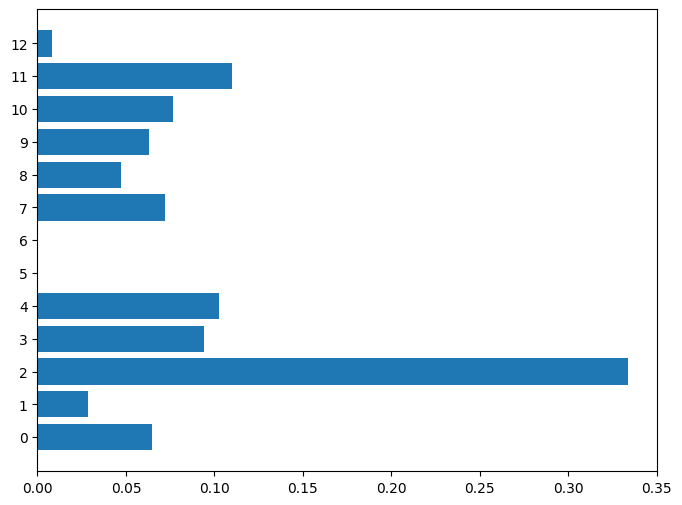

In [63]:
def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,6))
    n_features = 13
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plot_feature_importances_diabetes(dt)
plt.savefig('feature_importance')

In [64]:
# KNN

In [65]:
from sklearn.neighbors import KNeighborsClassifier

In [66]:
k_range=range(1,26)
scores={}
h_score = 0       # to find the best score
best_k=0          # to find the best k
scores_list=[]  

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    prediction_knn=knn.predict(X_test)
    scores[k]=accuracy_score(y_test,prediction_knn)
    if scores[k]>h_score:
        h_score = scores[k]
        best_k = k

    scores_list.append(accuracy_score(y_test,prediction_knn))
print('The best value of k is {} with score : {}'.format(best_k,h_score))

The best value of k is 4 with score : 0.8571428571428571


In [67]:
knn=KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [68]:
prediction_knn=knn.predict(X_test)
accuracy_knn=accuracy_score(y_test,prediction_knn)*100
print('accuracy_score score     : ',accuracy_score(y_test,prediction_knn)*100,'%')
print('mean_squared_error score : ',mean_squared_error(y_test,prediction_knn)*100,'%')

accuracy_score score     :  85.71428571428571 %
mean_squared_error score :  14.285714285714285 %


In [69]:
scores_dict['KNeighborsClassifier'] = accuracy_knn
accuracy_knn

85.71428571428571

In [70]:
print("Accuracy on training set: {:.3f}".format(knn.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(knn.score(X_test, y_test)))

Accuracy on training set: 0.868
Accuracy on test set: 0.857


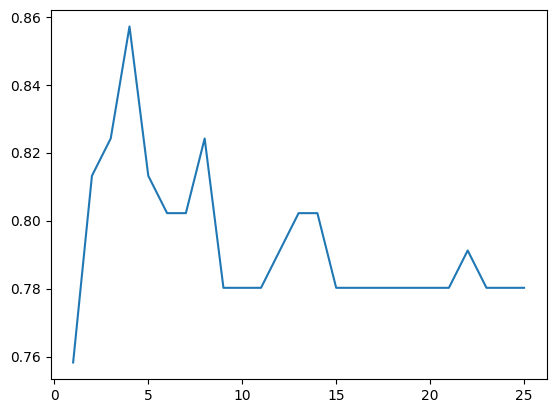

In [71]:
plt.plot(k_range,scores_list)

In [72]:
px.line(x=k_range,y=scores_list)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'x=%{x}<br>y=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
                          19, 20, 21, 22, 23, 24, 25], dtype=int64),
              'xaxis': 'x',
              'y': array([0.75824176, 0.81318681, 0.82417582, 0.85714286, 0.81318681, 0.8021978 ,
                          0.8021978 , 0.82417582, 0.78021978, 0.78021978, 0.78021978, 0.79120879,
                          0.8021978 , 0.8021978 , 0.78021978, 0.78021978, 0.78021978, 0.78021978,
                          0.78021978, 0.78021978, 0.78021978, 0.79120879, 0.78021978, 0.78021978,
                          0.78021978]),
              'yaxis': 'y'}],
    'layout': {'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'x'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'y'}}}
})

In [73]:


X_knn=np.array([[63 ,1, 3,145,233,1,0,150,0,2.3,0,0,1]])
# X_knn=np.array([[59,1,0,110,239,0,0,142,1,1.2,1,1,3]])
# X_knn=np.array([[44,1,1,120,263,0,1,173,0,0,2,0,3,1]])
X_knn=sc.transform(X_knn)

X_knn_prediction=knn.predict(X_knn)

c:\Users\Shubham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



In [74]:
X_knn

array([[ 0.9521966 ,  0.68100522,  1.97312292,  0.76395577, -0.25633371,
         2.394438  , -1.00583187,  0.01544279, -0.69663055,  1.08733806,
        -2.27457861, -0.71442887, -2.14887271]])

In [75]:
(X_knn_prediction[0])

0

In [76]:
print(Catagory[int(X_knn_prediction[0])])

No Heart Disease


In [77]:
# LGBMClassifier

In [78]:
from lightgbm import LGBMClassifier

lg=LGBMClassifier(boosting_type='gbdt',n_estimators=5000,learning_rate=0.05,objective='binary',metric='accuracy',is_unbalance=True,
                 colsample_bytree=0.7,reg_lambda=3,reg_alpha=3,random_state=500,n_jobs=-1,num_leaves=35)
lg.fit(X_train,y_train)
ypred = lg.predict(X_test)
print('===============================================')
print('With score : ',accuracy_score(y_test,ypred)*100)
print('===============================================')
scores_dict['LGBMClassifier'] = accuracy_score(y_test,ypred)*100

ModuleNotFoundError: No module named 'lightgbm'

In [79]:

from sklearn.svm import SVC

model = SVC(C=2.0,kernel='rbf',gamma='auto').fit(X_train,y_train)
Y_predict = model.predict(X_test)
print('Accuracy score : {}%'.format(accuracy_score(y_test,Y_predict)*100))
scores_dict['SVC'] = accuracy_score(y_test,Y_predict)*100

Accuracy score : 81.31868131868131%


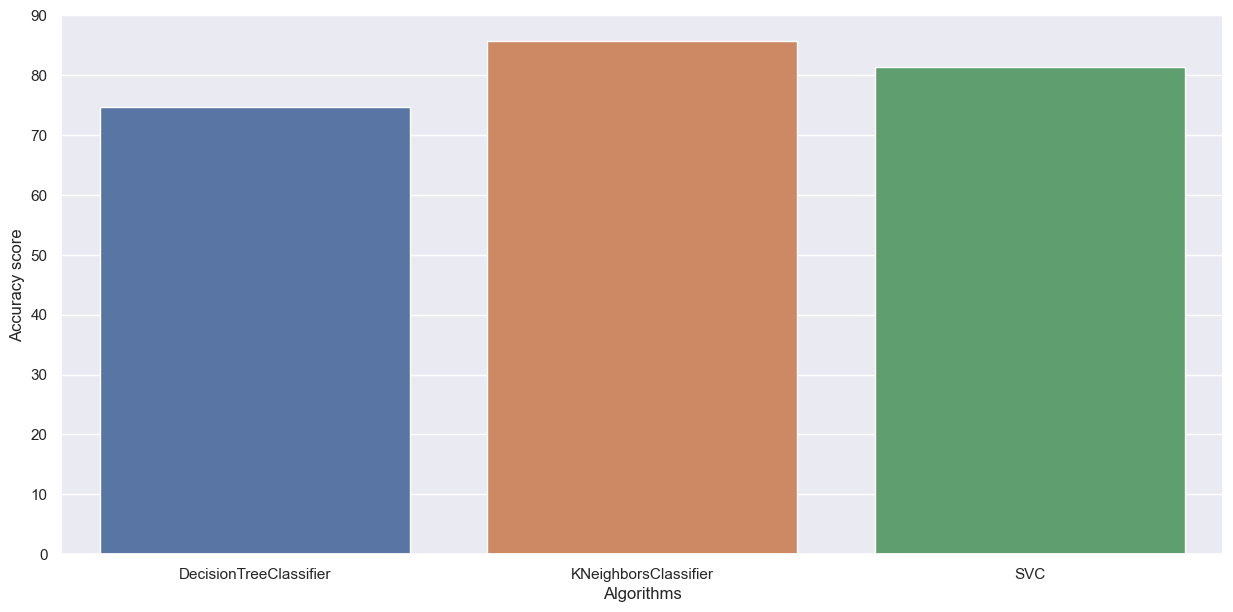

In [80]:
with sns.color_palette('muted'):
  algo_name = list(scores_dict.keys())
  scoress = list(scores_dict.values())

  sns.set(rc={'figure.figsize':(15,7)})
  plt.xlabel("Algorithms")
  plt.ylabel("Accuracy score")

  # sns.barplot(algo_name,scoress)
  sns.barplot(x=algo_name, y=scoress, data=heart)

In [81]:
# Define window
window = tk.Tk()
window.title("Heart Disease Prediction")

# Add widgets
tk.Label(window, text="Age").grid(row=0)
age_entry = tk.Entry(window, width=10)
age_entry.grid(row=1, column=0, columnspan=2)

tk.Label(window, text="Sex (0 = female, 1 = male)").grid(row=2)
sex_entry = tk.Entry(window, width=10)
sex_entry.grid(row=3, column=0, columnspan=2)

tk.Label(window, text="Chest pain type (1-4)").grid(row=4)
cp_entry = tk.Entry(window, width=10)
cp_entry.grid(row=5, column=0, columnspan=2)

tk.Label(window, text="Resting blood pressure").grid(row=6)
trestbps_entry = tk.Entry(window, width=10)
trestbps_entry.grid(row=7, column=0, columnspan=2)

tk.Label(window, text="Serum cholesterol (mg/dL)").grid(row=8)
chol_entry = tk.Entry(window, width=10)
chol_entry.grid(row=9, column=0, columnspan=2)

tk.Label(window, text="Fasting blood sugar (0 = no, 1 = yes)").grid(row=10)
fbs_entry = tk.Entry(window, width=10)
fbs_entry.grid(row=11, column=0, columnspan=2)

tk.Label(window, text="Resting electrocardiographic results (0-2)").grid(row=12)
restecg_entry = tk.Entry(window, width=10)
restecg_entry.grid(row=13, column=0, columnspan=2)

tk.Label(window, text="Maximum heart rate achieved").grid(row=14)
thalach_entry = tk.Entry(window, width=10)
thalach_entry.grid(row=15, column=0, columnspan=2)

tk.Label(window, text="Exercise induced angina (0 = no, 1 = yes)").grid(row=16)
exang_entry = tk.Entry(window, width=10)
exang_entry.grid(row=17, column=0, columnspan=2)

tk.Label(window, text="ST depression induced by exercise relative to rest").grid(row=18)
oldpeak_entry = tk.Entry(window, width=10)
oldpeak_entry.grid(row=19, column=0, columnspan=2)

tk.Label(window, text="Slope of the peak exercise ST segment (1-3)").grid(row=20)
slope_entry = tk.Entry(window, width=10)
slope_entry.grid(row=21, column=0, columnspan=2)

tk.Label(window, text="Number of major vessels (0-3) colored by flourosopy").grid(row=22)
ca_entry = tk.Entry(window, width=10)
ca_entry.grid(row=23, column=0, columnspan=2)

tk.Label(window, text="Thalassemia (1 = normal, 2 = fixed defect, 3 = reversable defect)").grid(row=24)
thal_entry = tk.Entry(window, width=10)
thal_entry.grid(row=25, column=0, columnspan=2)

# Add functionality
def predict():
# Get user input
    age = int(age_entry.get())
    sex = int(sex_entry.get())
    cp = int(cp_entry.get())
    trestbps = int(trestbps_entry.get())
    chol = int(chol_entry.get())
    fbs = int(fbs_entry.get())
    restecg = int(restecg_entry.get())
    thalach = int(thalach_entry.get())
    exang = int(exang_entry.get())
    oldpeak = float(oldpeak_entry.get())
    slope = int(slope_entry.get())
    ca = int(ca_entry.get())
    thal = int(thal_entry.get())

    # Make prediction
    new_data = [[age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]]
    # prediction = model.predict(new_data)[0]

    prediction = knn.predict(new_data)[0]

    # Update output label
    if prediction == 0:
        output_label.configure(text="No Heart Disease")
    else:
        output_label.configure(text="Heart Disease Detected")

# Add button
predict_button = tk.Button(window, text="Predict", command=predict)
predict_button.grid(row=27, column=0, columnspan=2)

# Add output label
output_label = tk.Label(window, text="")
output_label.grid(row=29, column=0, columnspan=2)

window.mainloop()